In [2]:
import sys
sys.path.insert(0, '../slowdaq')
from load_slowdaq import load_slow
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
slowdir = '/data/pb2/ChileData/slowdaq/22300000/20210226/'

In [4]:
files = sorted(glob(slowdir+'*774*'))
files

['/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_082225_Run22300774_000.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_082230_Run22300774_001.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_082341_Run22300774_002.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_085348_Run22300774_003.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_092552_Run22300774_004.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_095556_Run22300774_006.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_102825_Run22300774_007.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_105828_Run22300774_008.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_113123_Run22300774_009.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_120127_Run22300774_010.log.gz',
 '/data/pb2/ChileData/slowdaq/

In [5]:
data = load_slow(files = files, slowdir=slowdir, sources=['Lakeshore151'])

Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_082225_Run22300774_000.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_082230_Run22300774_001.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_082341_Run22300774_002.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_085348_Run22300774_003.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_092552_Run22300774_004.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_095556_Run22300774_006.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_102825_Run22300774_007.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_105828_Run22300774_008.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_113123_Run22300774_009.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210226/slowdaq_20210226_120127_Run22300774_0

In [6]:
ls = data['Lakeshore151']
time = np.array(ls['time']) - ls['time'][0]
key = 'MODEL370_370A4A_T'
#l = len(ls[key][0])
tmp = np.array(ls[key])[:,12]

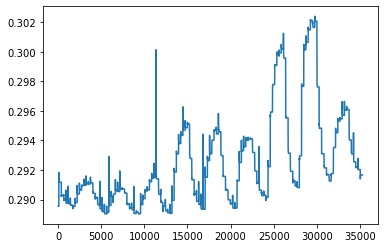

In [7]:
plt.plot(time, tmp)

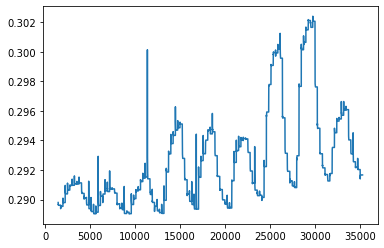

In [10]:
#fig = plt.figure(figsize=(20,10))

# for i in range(l):
#     tmp = np.array(ls[key])[:,i]

#     plt.plot(time, tmp, label=i)
s = 300
e = 7500
plt.plot(time[s:e], tmp[s:e])
#plt.plot(x, tmp_interp)
#plt.plot(x[rise], tmp_interp[rise], 'x')

In [11]:
time = time[s:e]
tmp = tmp[s:e]

x = np.linspace(time[0], time[-1], 150)
tmp_interp = np.interp(x, time, tmp)

In [35]:
rise = np.where(np.diff(tmp_interp)>4e-4)[0]
rise

array([  3,  19,  20,  35,  38,  40,  51,  52,  54,  55,  56,  68,  69,
        70,  72,  73,  84,  86,  87,  89, 100, 101, 103, 104, 105, 116,
       117, 119, 120, 121, 122, 124, 134, 135, 136])

In [39]:
a = np.where(np.diff(rise)<5)[0]+1
a

array([ 2,  4,  5,  7,  8,  9, 10, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23,
       24, 26, 27, 28, 29, 30, 31, 33, 34])

In [40]:
start_indices = np.delete(rise, a)
start_indices

array([  3,  19,  35,  51,  68,  84, 100, 116, 134])

In [41]:
conv = len(tmp_interp)/(x[-1] - x[0])
end_indices = np.round(start_indices + 25*60*conv).astype(dtype=np.int)

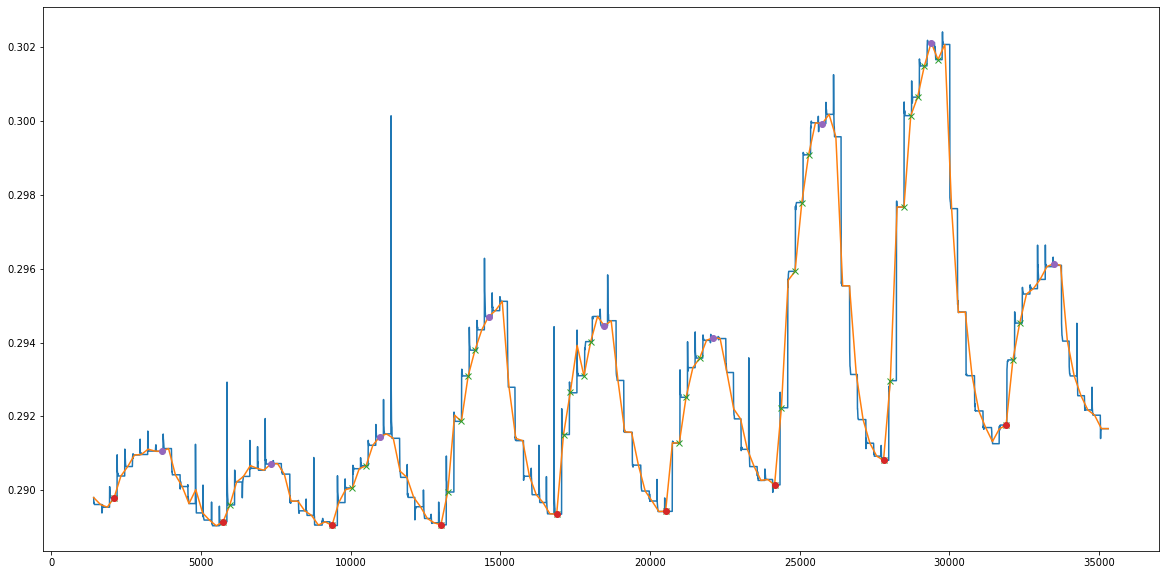

In [43]:
plt.figure(figsize=(20,10))
plt.plot(time, tmp)
plt.plot(x, tmp_interp)
plt.plot(x[rise], tmp_interp[rise], 'x')
plt.plot(x[start_indices], tmp_interp[start_indices], 'o')
plt.plot(x[end_indices], tmp_interp[end_indices], 'o')

In [44]:
heating = tmp_interp[end_indices]-tmp_interp[start_indices] 
heating *= 1000
heating

array([ 1.25653902,  1.56329214,  2.40571111,  5.64475894,  5.09970629,
        4.70546514,  9.7881302 , 11.3178459 ,  4.37433346])

In [45]:
az_v = np.linspace(0.25, 0.65, 9)
az_v

array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65])

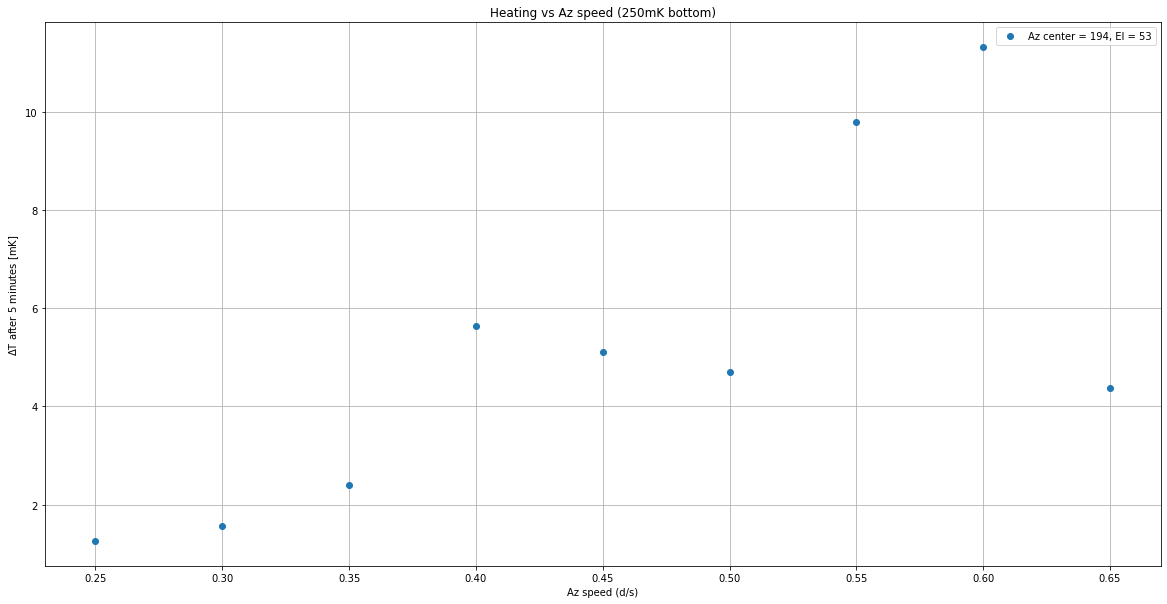

In [46]:
plt.figure(figsize=(20,10))
plt.plot(az_v, heating, 'o', label='Az center = 194, El = 53')
plt.title('Heating vs Az speed (250mK bottom)')
plt.ylabel('$\Delta$T after 5 minutes [mK]')
plt.xlabel('Az speed (d/s)')
plt.legend()
plt.grid()